## **Background of the NYC TLC Trip Record Dataset**

**The New York City Taxi and Limousine Commission (TLC)** Trip Record dataset contains detailed information about taxi and for-hire vehicle (FHV) trips in New York City. This dataset is an essential resource for analyzing urban transportation patterns, and it includes data from yellow taxis, green taxis, and FHVs, which cover a wide range of vehicles, including traditional livery cabs, luxury cars, and high-volume for-hire services (HVFHS) like those provided by app-based platforms such as Uber and Lyft.

### **Overview of the Dataset**

The dataset includes detailed information about each trip, such as pickup and drop-off times and locations, trip distances, fare amounts, and payment types. By leveraging this dataset, analysts can make data-driven decisions to improve the efficiency and effectiveness of NYC's transportation systems.

- **Trip Records**: Each row in the dataset represents a single trip. For yellow and green taxis, the data captures the pickup and drop-off dates and times, the locations (by taxi zone), the trip distance, and the itemized fare details. For FHVs, the dataset includes similar fields but also captures the dispatching base license number.
- **Data Coverage**: The dataset is updated monthly and includes comprehensive trip records dating back several years, allowing for robust trend analysis and time series studies.
- **Licensing and Management**: The data is managed by the NYC TLC, and its use is governed by the city's terms of use policies. The data is publicly accessible, promoting transparency and enabling extensive research and policy analysis.
- **Usage**: The dataset is utilized for various purposes, including transportation planning, policy-making, economic studies, and urban mobility research. It is a valuable asset for understanding how people move around the city and for identifying trends in transportation usage.

### **Integration with Additional Data Sources**

To provide deeper insights, the dataset can be enhanced with additional data sources:

1. **NYC Taxi Zones**: This dataset maps LocationIDs to specific geographic zones within NYC. By linking trip records to these zones, you can perform spatial analyses to understand how taxi usage varies across different parts of the city. This helps in visualizing and analyzing taxi activity by neighborhood​.
2. **Income Data from the U.S. Census Bureau**: The American Community Survey (ACS) provides detailed income data for various geographic areas in NYC. By combining this income data with the TLC dataset using borough and location keys, you can explore correlations between income levels and taxi usage. This can reveal patterns such as how frequently taxis are used in higher-income vs. lower-income areas, or how income levels influence the average fare paid and trip distance​.

The NYC TLC Trip Record dataset, enriched with geographic and socioeconomic data, provides a comprehensive view of taxi usage patterns in New York City. By leveraging this data, stakeholders can gain valuable insights into urban mobility, economic disparities, and potential areas for service improvement, ultimately contributing to a more efficient and equitable transportation system. For more detailed trip records and related data, you can explore the TLC's data page and the U.S. Census Bureau's

NYC Government  link = https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page <br>
U.S Cencus Bureau's link = https://data.census.gov/table/ACSST1Y2022.S1901?q=income%202022&g=060XX00US3600508510,3604710022,3606144919,3608160323,3608570915

## **DATA CLEANING**

### **Load Dataset**

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
taxi = pd.read_csv('NYC TLC Trip Record.csv')
taxi

C:\Users\malik\AppData\Local\Temp\ipykernel_548\3837569991.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [108]:
zone = pd.read_csv('taxi_zone_lookup.csv')
zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [109]:
income = pd.read_csv('nyc-income-borough.csv')
income

,Label (Grouping),"Bronx borough, Bronx County, New York!!Households!!Estimate","Bronx borough, Bronx County, New York!!Households!!Margin of Error","Bronx borough, Bronx County, New York!!Families!!Estimate","Bronx borough, Bronx County, New York!!Families!!Margin of Error","Bronx borough, Bronx County, New York!!Married-couple families!!Estimate","Bronx borough, Bronx County, New York!!Married-couple families!!Margin of Error","Bronx borough, Bronx County, New York!!Nonfamily households!!Estimate","Bronx borough, Bronx County, New York!!Nonfamily households!!Margin of Error","Brooklyn borough, Kings County, New York!!Households!!Estimate",...,"Queens borough, Queens County, New York!!Nonfamily households!!Estimate","Queens borough, Queens County, New York!!Nonfamily households!!Margin of Error","Staten Island borough, Richmond County, New York!!Households!!Estimate","Staten Island borough, Richmond County, New York!!Households!!Margin of Error","Staten Island borough, Richmond County, New York!!Families!!Estimate","Staten Island borough, Richmond County, New York!!Families!!Margin of Error","Staten Island borough, Richmond County, New York!!Married-couple families!!Estimate","Staten Island borough, Richmond County, New York!!Married-couple families!!Margin of Error","Staten Island borough, Richmond County, New York!!Nonfamily households!!Estimate","Staten Island borough, Richmond County, New York!!Nonfamily households!!Margin of Error"
0,Total,"533,035","±3,366","329,608","±7,357","139,814","±6,863","203,427","±6,989","1,026,361",...,"283,720","±8,480","169,946","±2,372","124,667","±3,790","91,618","±3,416","45,279","±3,510"
1,"Less than $10,000",14.4%,±1.3,10.4%,±1.2,3.4%,±1.0,22.0%,±2.3,8.1%,...,11.1%,±1.2,6.1%,±1.2,3.8%,±1.1,2.1%,±0.8,13.4%,±3.2
2,"$10,000 to $14,999",8.2%,±0.9,5.0%,±1.0,2.2%,±0.8,14.2%,±1.8,5.2%,...,6.7%,±0.8,3.0%,±0.8,1.6%,±0.7,0.9%,±0.5,6.7%,±2.2
3,"$15,000 to $24,999",9.7%,±0.9,9.0%,±1.2,6.2%,±1.3,11.9%,±1.5,7.5%,...,8.9%,±1.0,5.7%,±1.1,3.9%,±1.1,3.5%,±1.1,11.0%,±3.2
4,"$25,000 to $34,999",8.8%,±0.8,9.1%,±1.0,6.6%,±1.5,8.9%,±1.4,6.8%,...,8.5%,±0.9,6.3%,±1.3,4.2%,±1.1,4.0%,±1.2,13.0%,±3.5
5,"$35,000 to $49,999",12.0%,±1.3,12.8%,±1.5,11.1%,±1.8,11.4%,±1.9,9.1%,...,8.9%,±1.0,7.6%,±1.2,6.8%,±1.4,4.9%,±1.3,11.0%,±2.7
6,"$50,000 to $74,999",15.5%,±1.1,17.1%,±1.3,16.6%,±2.2,12.8%,±1.6,13.7%,...,17.8%,±1.7,12.5%,±1.6,12.1%,±1.8,10.5%,±2.0,15.1%,±3.3
7,"$75,000 to $99,999",10.6%,±1.0,11.3%,±1.2,14.0%,±2.1,8.4%,±1.4,11.7%,...,11.4%,±1.0,11.6%,±1.6,12.0%,±1.6,11.0%,±1.9,9.4%,±3.2
8,"$100,000 to $149,999",11.0%,±1.0,12.9%,±1.5,19.6%,±2.5,6.7%,±1.2,14.9%,...,14.0%,±1.2,19.5%,±2.0,21.8%,±2.2,22.8%,±2.6,13.1%,±3.5
9,"$150,000 to $199,999",5.5%,±0.7,7.2%,±0.9,11.7%,±1.9,2.3%,±0.7,8.3%,...,6.0%,±0.9,11.1%,±1.3,13.7%,±1.8,14.9%,±2.0,4.1%,±1.5


### **Handling Missing Values, Rename, Filtering Unused Feature**

In [110]:
missing_values = taxi.isnull().sum()
print(missing_values)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [111]:
missing_values = zone.isnull().sum()
print(missing_values)

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64


In [112]:
columns_with_missing_values = [
    'store_and_fwd_flag', 
    'RatecodeID', 
    'passenger_count', 
    'payment_type', 
    'trip_type', 
    'congestion_surcharge'
]
taxi = taxi.drop(columns=['ehail_fee'])
taxi = taxi.dropna(subset=columns_with_missing_values)

In [113]:
columns_with_missing_values2 = [
    'Borough', 
    'Zone', 
    'service_zone',
]
zone = zone.dropna(subset=columns_with_missing_values2)

In [114]:
missing_values = taxi.isnull().sum()
print(missing_values)

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [115]:
missing_values = zone.isnull().sum()
print(missing_values)

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64


In [116]:
# Removing unused columns for analysis
columns_to_drop = [
    'Bronx borough, Bronx County, New York!!Households!!Margin of Error',
    'Bronx borough, Bronx County, New York!!Families!!Estimate',
    'Bronx borough, Bronx County, New York!!Families!!Margin of Error',
    'Bronx borough, Bronx County, New York!!Married-couple families!!Estimate',
    'Bronx borough, Bronx County, New York!!Married-couple families!!Margin of Error',
    'Bronx borough, Bronx County, New York!!Nonfamily households!!Estimate',
    'Bronx borough, Bronx County, New York!!Nonfamily households!!Margin of Error',
    'Brooklyn borough, Kings County, New York!!Households!!Margin of Error',
    'Brooklyn borough, Kings County, New York!!Families!!Estimate',
    'Brooklyn borough, Kings County, New York!!Families!!Margin of Error',
    'Brooklyn borough, Kings County, New York!!Married-couple families!!Estimate',
    'Brooklyn borough, Kings County, New York!!Married-couple families!!Margin of Error',
    'Brooklyn borough, Kings County, New York!!Nonfamily households!!Estimate',
    'Brooklyn borough, Kings County, New York!!Nonfamily households!!Margin of Error',
    'Manhattan borough, New York County, New York!!Households!!Margin of Error',
    'Manhattan borough, New York County, New York!!Families!!Estimate',
    'Manhattan borough, New York County, New York!!Families!!Margin of Error',
    'Manhattan borough, New York County, New York!!Married-couple families!!Estimate',
    'Manhattan borough, New York County, New York!!Married-couple families!!Margin of Error',
    'Manhattan borough, New York County, New York!!Nonfamily households!!Estimate',
    'Manhattan borough, New York County, New York!!Nonfamily households!!Margin of Error',
    'Queens borough, Queens County, New York!!Households!!Margin of Error',
    'Queens borough, Queens County, New York!!Families!!Estimate',
    'Queens borough, Queens County, New York!!Families!!Margin of Error',
    'Queens borough, Queens County, New York!!Married-couple families!!Estimate',
    'Queens borough, Queens County, New York!!Married-couple families!!Margin of Error',
    'Queens borough, Queens County, New York!!Nonfamily households!!Estimate',
    'Queens borough, Queens County, New York!!Nonfamily households!!Margin of Error',
    'Staten Island borough, Richmond County, New York!!Households!!Margin of Error',
    'Staten Island borough, Richmond County, New York!!Families!!Estimate',
    'Staten Island borough, Richmond County, New York!!Families!!Margin of Error',
    'Staten Island borough, Richmond County, New York!!Married-couple families!!Estimate',
    'Staten Island borough, Richmond County, New York!!Married-couple families!!Margin of Error',
    'Staten Island borough, Richmond County, New York!!Nonfamily households!!Estimate',
    'Staten Island borough, Richmond County, New York!!Nonfamily households!!Margin of Error'
]

income = income.drop(columns=columns_to_drop, axis=1)
income

,Label (Grouping),"Bronx borough, Bronx County, New York!!Households!!Estimate","Brooklyn borough, Kings County, New York!!Households!!Estimate","Manhattan borough, New York County, New York!!Households!!Estimate","Queens borough, Queens County, New York!!Households!!Estimate","Staten Island borough, Richmond County, New York!!Households!!Estimate"
0,Total,"533,035","1,026,361","803,844","839,853","169,946"
1,"Less than $10,000",14.4%,8.1%,9.1%,5.9%,6.1%
2,"$10,000 to $14,999",8.2%,5.2%,5.3%,3.7%,3.0%
3,"$15,000 to $24,999",9.7%,7.5%,6.1%,6.3%,5.7%
4,"$25,000 to $34,999",8.8%,6.8%,4.5%,6.8%,6.3%
5,"$35,000 to $49,999",12.0%,9.1%,7.1%,8.5%,7.6%
6,"$50,000 to $74,999",15.5%,13.7%,10.3%,16.0%,12.5%
7,"$75,000 to $99,999",10.6%,11.7%,8.9%,12.0%,11.6%
8,"$100,000 to $149,999",11.0%,14.9%,13.2%,18.3%,19.5%
9,"$150,000 to $199,999",5.5%,8.3%,8.8%,10.5%,11.1%


In [117]:
# Rename columns for readability
new_column_names = {
    'Bronx borough, Bronx County, New York!!Households!!Estimate': 'Bronx',
    'Brooklyn borough, Kings County, New York!!Households!!Estimate': 'Brooklyn',
    'Manhattan borough, New York County, New York!!Households!!Estimate': 'Manhattan',
    'Queens borough, Queens County, New York!!Households!!Estimate': 'Queens',
    'Staten Island borough, Richmond County, New York!!Households!!Estimate': 'Staten Island'
}

# Rename the columns
income.rename(columns=new_column_names, inplace=True)
income

,Label (Grouping),Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Total,"533,035","1,026,361","803,844","839,853","169,946"
1,"Less than $10,000",14.4%,8.1%,9.1%,5.9%,6.1%
2,"$10,000 to $14,999",8.2%,5.2%,5.3%,3.7%,3.0%
3,"$15,000 to $24,999",9.7%,7.5%,6.1%,6.3%,5.7%
4,"$25,000 to $34,999",8.8%,6.8%,4.5%,6.8%,6.3%
5,"$35,000 to $49,999",12.0%,9.1%,7.1%,8.5%,7.6%
6,"$50,000 to $74,999",15.5%,13.7%,10.3%,16.0%,12.5%
7,"$75,000 to $99,999",10.6%,11.7%,8.9%,12.0%,11.6%
8,"$100,000 to $149,999",11.0%,14.9%,13.2%,18.3%,19.5%
9,"$150,000 to $199,999",5.5%,8.3%,8.8%,10.5%,11.1%


In [118]:
missing_values = income.isnull().sum()
print(missing_values)

Label (Grouping)    0
Bronx               1
Brooklyn            1
Manhattan           1
Queens              1
Staten Island       1
dtype: int64


In [119]:
columns_with_missing_values3 = [
    'Bronx', 
    'Brooklyn', 
    'Manhattan',
    'Queens',
    'Staten Island',
]
income = income.dropna(subset=columns_with_missing_values3)

In [120]:
missing_values = income.isnull().sum()
print(missing_values)

Label (Grouping)    0
Bronx               0
Brooklyn            0
Manhattan           0
Queens              0
Staten Island       0
dtype: int64


In [121]:
# Rename columns for readability
taxi.rename(columns={
    'VendorID': 'vendor_id',
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime',
    'trip_distance': 'trip_distance_miles',
    'RatecodeID': 'rate_code_id',
    'PULocationID': 'pickup_location_id',
    'DOLocationID': 'dropoff_location_id',
    'fare_amount': 'fare_amount_usd',
    'extra': 'extra_usd',
    'mta_tax': 'mta_tax_usd',
    'tip_amount': 'tip_amount_usd',
    'tolls_amount': 'tolls_amount_usd',
    'improvement_surcharge': 'improvement_surcharge_usd',
    'total_amount': 'total_amount_usd',
    'congestion_surcharge': 'congestion_surcharge_usd'
}, inplace=True)

### **Removing Duplicates**

In [122]:
duplicates = taxi.duplicated().sum()
print(f'Duplicates: {duplicates}')
duplicates2 = zone.duplicated().sum()
print(f'Duplicates: {duplicates2}')
duplicates3 = income.duplicated().sum()
print(f'Duplicates: {duplicates3}')
# df = df.drop_duplicates()

Duplicates: 0
Duplicates: 0
Duplicates: 0


### **Correcting Data Types**

In [123]:
print(taxi.dtypes)

vendor_id                      int64
pickup_datetime               object
dropoff_datetime              object
store_and_fwd_flag            object
rate_code_id                 float64
pickup_location_id             int64
dropoff_location_id            int64
passenger_count              float64
trip_distance_miles          float64
fare_amount_usd              float64
extra_usd                    float64
mta_tax_usd                  float64
tip_amount_usd               float64
tolls_amount_usd             float64
improvement_surcharge_usd    float64
total_amount_usd             float64
payment_type                 float64
trip_type                    float64
congestion_surcharge_usd     float64
dtype: object


In [124]:
# Convert datetime columns
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

# Convert numeric columns
numeric_columns = ['passenger_count', 'trip_distance_miles', 'fare_amount_usd', 'extra_usd', 'mta_tax_usd', 
                   'tip_amount_usd', 'tolls_amount_usd', 'improvement_surcharge_usd', 'total_amount_usd', 
                   'congestion_surcharge_usd']
taxi[numeric_columns] = taxi[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns
categorical_columns = ['vendor_id', 'rate_code_id', 'store_and_fwd_flag', 'payment_type', 'trip_type']
taxi[categorical_columns] = taxi[categorical_columns].astype('category')

# Convert location ID columns to integer
location_columns = ['pickup_location_id', 'dropoff_location_id']
taxi[location_columns] = taxi[location_columns].astype(int)

In [125]:
taxi

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [126]:
zone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    263 non-null    int64 
 1   Borough       263 non-null    object
 2   Zone          263 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.3+ KB


In [127]:
categorical_columns1 = ['Borough', 'Zone', 'service_zone']
zone[categorical_columns1] = zone[categorical_columns1].astype('category')

C:\Users\malik\AppData\Local\Temp\ipykernel_548\1344199093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone[categorical_columns1] = zone[categorical_columns1].astype('category')


### **Handling Income Datasets**

In [128]:
income

,Label (Grouping),Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Total,"533,035","1,026,361","803,844","839,853","169,946"
1,"Less than $10,000",14.4%,8.1%,9.1%,5.9%,6.1%
2,"$10,000 to $14,999",8.2%,5.2%,5.3%,3.7%,3.0%
3,"$15,000 to $24,999",9.7%,7.5%,6.1%,6.3%,5.7%
4,"$25,000 to $34,999",8.8%,6.8%,4.5%,6.8%,6.3%
5,"$35,000 to $49,999",12.0%,9.1%,7.1%,8.5%,7.6%
6,"$50,000 to $74,999",15.5%,13.7%,10.3%,16.0%,12.5%
7,"$75,000 to $99,999",10.6%,11.7%,8.9%,12.0%,11.6%
8,"$100,000 to $149,999",11.0%,14.9%,13.2%,18.3%,19.5%
9,"$150,000 to $199,999",5.5%,8.3%,8.8%,10.5%,11.1%


In [129]:
# Transpose the income DataFrame
income_transposed = income.T

# Reset index to make row index into a column
income_transposed.reset_index(inplace=True)

# Rename the columns
income_transposed.columns = income_transposed.iloc[0]

# Drop the first row as it is now redundant
income_transposed = income_transposed.drop(0)

# Rename the index column to 'location'
income_transposed.rename(columns={'index': 'location'}, inplace=True)

# Display the modified DataFrame
income_transposed.columns

Index(['Label (Grouping)', 'Total', '    Less than $10,000',
       '    $10,000 to $14,999', '    $15,000 to $24,999',
       '    $25,000 to $34,999', '    $35,000 to $49,999',
       '    $50,000 to $74,999', '    $75,000 to $99,999',
       '    $100,000 to $149,999', '    $150,000 to $199,999',
       '    $200,000 or more', 'Median income (dollars)',
       'Mean income (dollars)', '    Household income in the past 12 months',
       '    Family income in the past 12 months',
       '    Nonfamily income in the past 12 months'],
      dtype='object', name=0)

In [130]:
columns_to_drop = [
    '    Less than $10,000',
    '    $10,000 to $14,999',
    '    $15,000 to $24,999',
    '    $25,000 to $34,999',
    '    $35,000 to $49,999',
    '    $50,000 to $74,999',
    '    $75,000 to $99,999',
    '    $100,000 to $149,999',
    '    $150,000 to $199,999',
    '    $200,000 or more',
    '    Household income in the past 12 months',
    '    Family income in the past 12 months',
    '    Nonfamily income in the past 12 months'
]

income_transposed = income_transposed.drop(columns=columns_to_drop, axis=1)
income_transposed

,Label (Grouping),Total,Median income (dollars),Mean income (dollars)
1,Bronx,"533,035","45,517","66,878"
2,Brooklyn,"1,026,361","73,951","115,625"
3,Manhattan,"803,844","95,866","175,743"
4,Queens,"839,853","80,557","106,667"
5,Staten Island,"169,946","93,164","119,550"


In [131]:
new_column_names = {
    'Label (Grouping)': 'Locations',
    'Total' : 'Total_Population',
    'Median income (dollars)' : 'locations_median_income',
    'Mean income (dollars)' : 'locations_mean_income'
}

# Rename the columns
income_transposed.rename(columns=new_column_names, inplace=True)
income_transposed

,Locations,Total_Population,locations_median_income,locations_mean_income
1,Bronx,"533,035","45,517","66,878"
2,Brooklyn,"1,026,361","73,951","115,625"
3,Manhattan,"803,844","95,866","175,743"
4,Queens,"839,853","80,557","106,667"
5,Staten Island,"169,946","93,164","119,550"


In [132]:
income_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locations                5 non-null      object
 1   Total_Population         5 non-null      object
 2   locations_median_income  5 non-null      object
 3   locations_mean_income    5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [133]:
income_transposed['locations_median_income'] = income_transposed['locations_median_income'].str.replace(',', '')
income_transposed['locations_mean_income'] = income_transposed['locations_mean_income'].str.replace(',', '')
income_transposed['Total_Population'] = income_transposed['Total_Population'].str.replace(',', '')

In [134]:
income_transposed['Locations'] = income_transposed['Locations'].astype('category')
income_transposed['Total_Population'] = income_transposed['Total_Population'].astype(int)
income_transposed['locations_median_income'] = income_transposed['locations_median_income'].astype(int)
income_transposed['locations_mean_income'] = income_transposed['locations_mean_income'].astype(int)

In [135]:
income_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Locations                5 non-null      category
 1   Total_Population         5 non-null      int32   
 2   locations_median_income  5 non-null      int32   
 3   locations_mean_income    5 non-null      int32   
dtypes: category(1), int32(3)
memory usage: 409.0 bytes


In [136]:
income_transposed

,Locations,Total_Population,locations_median_income,locations_mean_income
1,Bronx,533035,45517,66878
2,Brooklyn,1026361,73951,115625
3,Manhattan,803844,95866,175743
4,Queens,839853,80557,106667
5,Staten Island,169946,93164,119550


### **Filtering Outliers NYC TLC Dataset**

**Identify Outliers Data**

In [137]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63877 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   vendor_id                  63877 non-null  category      
 1   pickup_datetime            63877 non-null  datetime64[ns]
 2   dropoff_datetime           63877 non-null  datetime64[ns]
 3   store_and_fwd_flag         63877 non-null  category      
 4   rate_code_id               63877 non-null  category      
 5   pickup_location_id         63877 non-null  int32         
 6   dropoff_location_id        63877 non-null  int32         
 7   passenger_count            63877 non-null  float64       
 8   trip_distance_miles        63877 non-null  float64       
 9   fare_amount_usd            63877 non-null  float64       
 10  extra_usd                  63877 non-null  float64       
 11  mta_tax_usd                63877 non-null  float64       
 12  tip_amoun

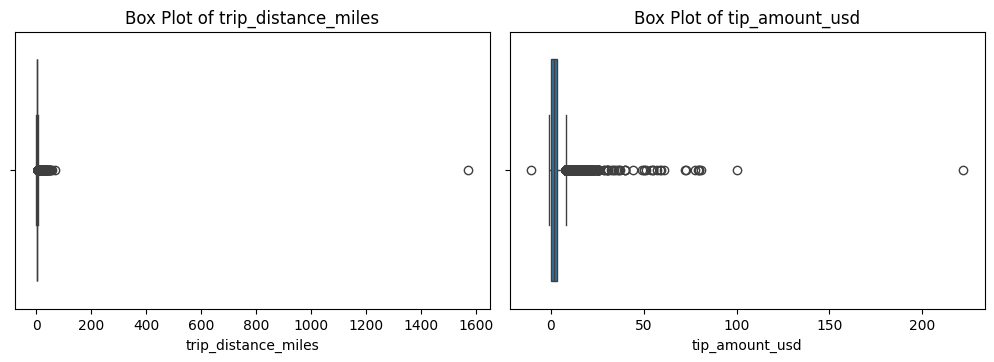

In [138]:
# List of columns to create box plots for
columns_to_check = ['trip_distance_miles', 'tip_amount_usd']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a box plot for each column
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=taxi[column])
    plt.title(f'Box Plot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [139]:
taxi[taxi['trip_distance_miles'] > 200]

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75


In [140]:
taxi[taxi['tip_amount_usd'] > 200]

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
50588,2,2023-01-25 18:24:30,2023-01-25 18:28:48,N,1.0,223,223,1.0,0.76,6.5,2.5,0.5,222.22,0.0,1.0,232.72,1.0,1.0,0.0


**Deleting Outliers**

In [141]:
taxi = taxi[(taxi['trip_distance_miles'] <= 200) & (taxi['tip_amount_usd'] <= 200)].reset_index(drop=True)
taxi

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63870,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63871,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63872,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63873,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [142]:
#Filtering Mines Values
taxi = taxi.loc[~(taxi[columns_to_check] < 0).any(axis=1)]

### **Filtering Unrealistic Values**

In [143]:
taxi

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63870,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63871,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63872,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63873,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [144]:
# Filtering 0 or Below data for key feature
taxi = taxi[(taxi['passenger_count'] > 0) & (taxi['trip_distance_miles'] > 0) & (taxi['fare_amount_usd'] > 0) & (taxi['total_amount_usd'] > 0)]

In [145]:
# make sure dropoff date time is always after pickup date time
taxi = taxi[taxi['dropoff_datetime'] > taxi['pickup_datetime']]

In [146]:
# make sure only 2023 is on Dataset
taxi = taxi[taxi['pickup_datetime'].dt.year == 2023]

### **Decode Feature**

In [147]:
vendor_mapping = {1: 'CreativeMobileTechnologies, LLC', 2: 'VeriFone Inc'}
taxi['vendor_id'] = taxi['vendor_id'].map(vendor_mapping)

RateCode_mapping = {1: 'Standard Rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated Fare', 6: 'Group Ride'}
taxi['rate_code_id'] = taxi['rate_code_id'].map(RateCode_mapping)

StoreForwartaxilag_mapping = {'Y': 'Store and Forward Trip', 'N': 'Not a Store and Forward Trip'}
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].map(StoreForwartaxilag_mapping)

Payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
taxi['payment_type'] = taxi['payment_type'].map(Payment_mapping)

Trip_mapping = {1: 'Street-hail', 2: 'Dispatch'}
taxi['trip_type'] = taxi['trip_type'].map(Trip_mapping)

taxi.rename(columns={'vendor_id': 'vendor'}, inplace=True)
taxi.rename(columns={'rate_code_id': 'rate_code'}, inplace=True)
taxi.rename(columns={'store_and_fwd_flag': 'record_flag'}, inplace=True)

taxi

,vendor,pickup_datetime,dropoff_datetime,record_flag,rate_code,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,Not a Store and Forward Trip,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,Not a Store and Forward Trip,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00
3,"CreativeMobileTechnologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,Not a Store and Forward Trip,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00
4,"CreativeMobileTechnologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,Not a Store and Forward Trip,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00
5,VeriFone Inc,2023-01-01 00:53:31,2023-01-01 01:11:04,Not a Store and Forward Trip,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63870,VeriFone Inc,2023-01-31 23:09:22,2023-01-31 23:17:21,Not a Store and Forward Trip,Negotiated Fare,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,Credit Card,Dispatch,0.00
63871,VeriFone Inc,2023-01-31 23:06:18,2023-01-31 23:17:03,Not a Store and Forward Trip,Standard Rate,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,Credit Card,Street-hail,0.00
63872,VeriFone Inc,2023-01-31 23:17:03,2023-01-31 23:23:04,Not a Store and Forward Trip,Standard Rate,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,Credit Card,Street-hail,0.00
63873,VeriFone Inc,2023-01-31 23:29:18,2023-01-31 23:38:50,Not a Store and Forward Trip,Standard Rate,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,Credit Card,Street-hail,2.75


### **Export Dataset**

In [148]:
taxi.to_csv('cleaned_nyc_tlc_trip_data.csv', index=False)

In [149]:
zone.to_csv('cleaned_nyc_zone.csv', index=False)

In [150]:
income_transposed.to_csv('cleaned_nyc_income.csv', index=False)

### **Connecting Dataset**

In [151]:
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [152]:
taxi.head()

,vendor,pickup_datetime,dropoff_datetime,record_flag,rate_code,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,extra_usd,mta_tax_usd,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,Not a Store and Forward Trip,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,Not a Store and Forward Trip,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00
3,"CreativeMobileTechnologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,Not a Store and Forward Trip,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00
4,"CreativeMobileTechnologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,Not a Store and Forward Trip,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00
5,VeriFone Inc,2023-01-01 00:53:31,2023-01-01 01:11:04,Not a Store and Forward Trip,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75


In [153]:
merged_df = pd.merge(zone, taxi, left_on='LocationID', right_on='pickup_location_id')
merged_df.columns

Index(['LocationID', 'Borough', 'Zone', 'service_zone', 'vendor',
       'pickup_datetime', 'dropoff_datetime', 'record_flag', 'rate_code',
       'pickup_location_id', 'dropoff_location_id', 'passenger_count',
       'trip_distance_miles', 'fare_amount_usd', 'extra_usd', 'mta_tax_usd',
       'tip_amount_usd', 'tolls_amount_usd', 'improvement_surcharge_usd',
       'total_amount_usd', 'payment_type', 'trip_type',
       'congestion_surcharge_usd'],
      dtype='object')

In [154]:
income_transposed.head()

,Locations,Total_Population,locations_median_income,locations_mean_income
1,Bronx,533035,45517,66878
2,Brooklyn,1026361,73951,115625
3,Manhattan,803844,95866,175743
4,Queens,839853,80557,106667
5,Staten Island,169946,93164,119550


In [155]:
merged_df2 = pd.merge(merged_df, income_transposed, left_on='Borough', right_on='Locations')
merged_df2 = merged_df2.drop(columns='Locations', axis=1)
merged_df2

,LocationID,Borough,Zone,service_zone,vendor,pickup_datetime,dropoff_datetime,record_flag,rate_code,pickup_location_id,...,tip_amount_usd,tolls_amount_usd,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd,Total_Population,locations_median_income,locations_mean_income
0,3,Bronx,Allerton/Pelham Gardens,Boro Zone,VeriFone Inc,2023-01-09 12:37:24,2023-01-09 12:44:45,Not a Store and Forward Trip,Negotiated Fare,3,...,0.00,0.0,1.0,11.00,Cash,Dispatch,0.00,533035,45517,66878
1,3,Bronx,Allerton/Pelham Gardens,Boro Zone,VeriFone Inc,2023-01-20 22:22:02,2023-01-20 22:26:04,Not a Store and Forward Trip,Standard Rate,3,...,0.00,0.0,1.0,9.70,Cash,Street-hail,0.00,533035,45517,66878
2,7,Queens,Astoria,Boro Zone,VeriFone Inc,2023-01-01 00:31:06,2023-01-01 00:42:23,Not a Store and Forward Trip,Standard Rate,7,...,0.00,0.0,1.0,15.30,Cash,Street-hail,0.00,839853,80557,106667
3,7,Queens,Astoria,Boro Zone,VeriFone Inc,2023-01-01 00:42:49,2023-01-01 00:51:53,Not a Store and Forward Trip,Standard Rate,7,...,0.00,0.0,1.0,13.20,Cash,Street-hail,0.00,839853,80557,106667
4,7,Queens,Astoria,Boro Zone,VeriFone Inc,2023-01-01 00:52:03,2023-01-01 00:57:56,Not a Store and Forward Trip,Standard Rate,7,...,2.60,0.0,1.0,13.00,Credit Card,Street-hail,0.00,839853,80557,106667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60199,263,Manhattan,Yorkville West,Yellow Zone,VeriFone Inc,2023-01-29 21:51:10,2023-01-29 22:05:13,Not a Store and Forward Trip,Standard Rate,263,...,0.00,0.0,1.0,27.15,Credit Card,Street-hail,2.75,803844,95866,175743
60200,263,Manhattan,Yorkville West,Yellow Zone,VeriFone Inc,2023-01-30 08:14:50,2023-01-30 08:30:37,Not a Store and Forward Trip,Standard Rate,263,...,0.00,0.0,1.0,16.40,Cash,Street-hail,0.00,803844,95866,175743
60201,263,Manhattan,Yorkville West,Yellow Zone,VeriFone Inc,2023-01-30 16:46:58,2023-01-30 16:49:31,Not a Store and Forward Trip,Standard Rate,263,...,2.00,0.0,1.0,10.40,Credit Card,Street-hail,0.00,803844,95866,175743
60202,263,Manhattan,Yorkville West,Yellow Zone,VeriFone Inc,2023-01-31 09:38:00,2023-01-31 09:42:22,Not a Store and Forward Trip,Standard Rate,263,...,0.00,0.0,1.0,10.75,Credit Card,Street-hail,2.75,803844,95866,175743


### **Selecting Features**

In [156]:
taxi.columns

Index(['vendor', 'pickup_datetime', 'dropoff_datetime', 'record_flag',
       'rate_code', 'pickup_location_id', 'dropoff_location_id',
       'passenger_count', 'trip_distance_miles', 'fare_amount_usd',
       'extra_usd', 'mta_tax_usd', 'tip_amount_usd', 'tolls_amount_usd',
       'improvement_surcharge_usd', 'total_amount_usd', 'payment_type',
       'trip_type', 'congestion_surcharge_usd'],
      dtype='object')

In [159]:
complete_data = merged_df2[[
    'vendor', 'pickup_datetime', 'dropoff_datetime', 'record_flag', 'rate_code',
    'pickup_location_id', 'dropoff_location_id', 'passenger_count', 'trip_distance_miles',
    'fare_amount_usd', 'extra_usd', 'mta_tax_usd', 'tip_amount_usd', 'tolls_amount_usd',
    'improvement_surcharge_usd', 'total_amount_usd', 'payment_type', 'trip_type',
    'congestion_surcharge_usd', 'LocationID', 'Borough', 'Zone',
    'locations_median_income', 'Total_Population'
]]
complete_data

,vendor,pickup_datetime,dropoff_datetime,record_flag,rate_code,pickup_location_id,dropoff_location_id,passenger_count,trip_distance_miles,fare_amount_usd,...,improvement_surcharge_usd,total_amount_usd,payment_type,trip_type,congestion_surcharge_usd,LocationID,Borough,Zone,locations_median_income,Total_Population
0,VeriFone Inc,2023-01-09 12:37:24,2023-01-09 12:44:45,Not a Store and Forward Trip,Negotiated Fare,3,3,1.0,1.15,10.0,...,1.0,11.00,Cash,Dispatch,0.00,3,Bronx,Allerton/Pelham Gardens,45517,533035
1,VeriFone Inc,2023-01-20 22:22:02,2023-01-20 22:26:04,Not a Store and Forward Trip,Standard Rate,3,51,5.0,1.09,7.2,...,1.0,9.70,Cash,Street-hail,0.00,3,Bronx,Allerton/Pelham Gardens,45517,533035
2,VeriFone Inc,2023-01-01 00:31:06,2023-01-01 00:42:23,Not a Store and Forward Trip,Standard Rate,7,260,1.0,2.02,12.8,...,1.0,15.30,Cash,Street-hail,0.00,7,Queens,Astoria,80557,839853
3,VeriFone Inc,2023-01-01 00:42:49,2023-01-01 00:51:53,Not a Store and Forward Trip,Standard Rate,7,223,1.0,1.37,10.7,...,1.0,13.20,Cash,Street-hail,0.00,7,Queens,Astoria,80557,839853
4,VeriFone Inc,2023-01-01 00:52:03,2023-01-01 00:57:56,Not a Store and Forward Trip,Standard Rate,7,260,1.0,1.18,7.9,...,1.0,13.00,Credit Card,Street-hail,0.00,7,Queens,Astoria,80557,839853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60199,VeriFone Inc,2023-01-29 21:51:10,2023-01-29 22:05:13,Not a Store and Forward Trip,Standard Rate,263,100,1.0,4.68,21.9,...,1.0,27.15,Credit Card,Street-hail,2.75,263,Manhattan,Yorkville West,95866,803844
60200,VeriFone Inc,2023-01-30 08:14:50,2023-01-30 08:30:37,Not a Store and Forward Trip,Standard Rate,263,238,1.0,1.59,14.9,...,1.0,16.40,Cash,Street-hail,0.00,263,Manhattan,Yorkville West,95866,803844
60201,VeriFone Inc,2023-01-30 16:46:58,2023-01-30 16:49:31,Not a Store and Forward Trip,Standard Rate,263,75,1.0,0.36,4.4,...,1.0,10.40,Credit Card,Street-hail,0.00,263,Manhattan,Yorkville West,95866,803844
60202,VeriFone Inc,2023-01-31 09:38:00,2023-01-31 09:42:22,Not a Store and Forward Trip,Standard Rate,263,236,1.0,0.60,6.5,...,1.0,10.75,Credit Card,Street-hail,2.75,263,Manhattan,Yorkville West,95866,803844


In [160]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60204 entries, 0 to 60203
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   vendor                     60204 non-null  category      
 1   pickup_datetime            60204 non-null  datetime64[ns]
 2   dropoff_datetime           60204 non-null  datetime64[ns]
 3   record_flag                60204 non-null  category      
 4   rate_code                  60204 non-null  category      
 5   pickup_location_id         60204 non-null  int32         
 6   dropoff_location_id        60204 non-null  int32         
 7   passenger_count            60204 non-null  float64       
 8   trip_distance_miles        60204 non-null  float64       
 9   fare_amount_usd            60204 non-null  float64       
 10  extra_usd                  60204 non-null  float64       
 11  mta_tax_usd                60204 non-null  float64       
 12  tip_

In [161]:
complete_data = complete_data.sort_values(by='pickup_datetime').reset_index(drop=True)
complete_data.columns

Index(['vendor', 'pickup_datetime', 'dropoff_datetime', 'record_flag',
       'rate_code', 'pickup_location_id', 'dropoff_location_id',
       'passenger_count', 'trip_distance_miles', 'fare_amount_usd',
       'extra_usd', 'mta_tax_usd', 'tip_amount_usd', 'tolls_amount_usd',
       'improvement_surcharge_usd', 'total_amount_usd', 'payment_type',
       'trip_type', 'congestion_surcharge_usd', 'LocationID', 'Borough',
       'Zone', 'locations_median_income', 'Total_Population'],
      dtype='object')

In [162]:
complete_data.to_csv('cleaned_nyc_Combined_data.csv', index=False)

### **Exploration Data Analysis**

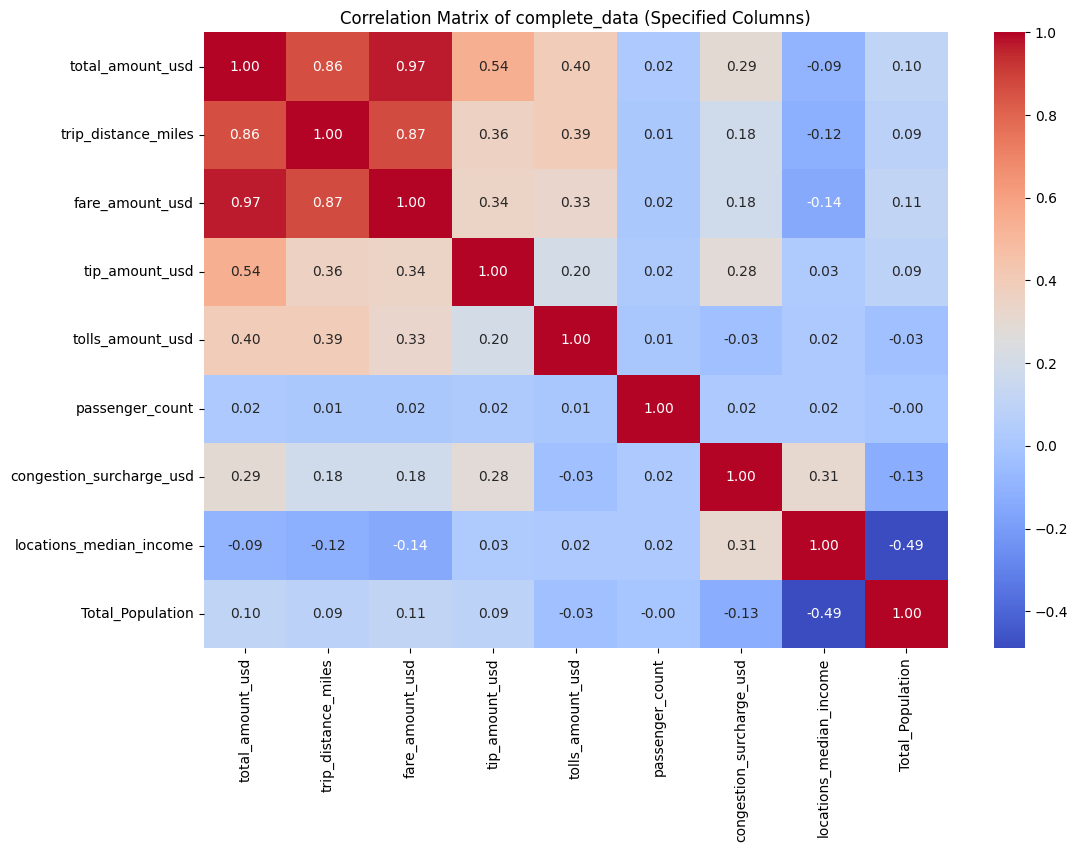

In [163]:
# Exclude specific columns and all string columns
included_columns = ['total_amount_usd', 'trip_distance_miles', 'fare_amount_usd', 'tip_amount_usd', 'tolls_amount_usd', 'passenger_count','congestion_surcharge_usd', 'locations_median_income', 'Total_Population']
numerical_data = complete_data[included_columns]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Add a title to the heatmap
plt.title('Correlation Matrix of complete_data (Specified Columns)')

# Show the plot
plt.show()

In [164]:
complete_data[['total_amount_usd', 'trip_distance_miles', 'fare_amount_usd', 'tip_amount_usd', 'tolls_amount_usd', 'passenger_count','congestion_surcharge_usd', 'locations_median_income', 'Total_Population']].corr(method = 'spearman')

,total_amount_usd,trip_distance_miles,fare_amount_usd,tip_amount_usd,tolls_amount_usd,passenger_count,congestion_surcharge_usd,locations_median_income,Total_Population
total_amount_usd,1.000000,0.889019,0.944576,0.479241,0.219800,0.034450,0.446953,-0.086229,0.088250
trip_distance_miles,0.889019,1.000000,0.928888,0.280236,0.215564,0.018898,0.320364,-0.103722,0.099095
fare_amount_usd,0.944576,0.928888,1.000000,0.279434,0.206741,0.031105,0.303086,-0.148803,0.141654
tip_amount_usd,0.479241,0.280236,0.279434,1.000000,0.091293,0.016986,0.339021,0.082169,-0.053107
tolls_amount_usd,0.219800,0.215564,0.206741,0.091293,1.000000,0.006432,-0.032650,0.028423,-0.035022
passenger_count,0.034450,0.018898,0.031105,0.016986,0.006432,1.000000,0.010394,-0.037257,0.035066
congestion_surcharge_usd,0.446953,0.320364,0.303086,0.339021,-0.032650,0.010394,1.000000,0.323203,-0.303511
locations_median_income,-0.086229,-0.103722,-0.148803,0.082169,0.028423,-0.037257,0.323203,1.000000,-0.925470
Total_Population,0.088250,0.099095,0.141654,-0.053107,-0.035022,0.035066,-0.303511,-0.925470,1.000000


In [165]:
complete_data[['locations_median_income', 'Borough']].drop_duplicates().sort_values(by='locations_median_income').reset_index(drop=True)

,locations_median_income,Borough
0,45517,Bronx
1,73951,Brooklyn
2,80557,Queens
3,93164,Staten Island
4,95866,Manhattan


In [166]:
complete_data.groupby('Borough')['total_amount_usd'].mean().reset_index()

,Borough,total_amount_usd
0,Bronx,21.136755
1,Brooklyn,25.217060
2,Manhattan,20.134829
3,Queens,21.687253
4,Staten Island,25.378889


In [167]:
# Calculate the average total amount by zone
avg_total_amount_by_zone = complete_data.groupby('Zone')['total_amount_usd'].mean().reset_index()

# Categorize each zone based on the average total amount
def categorize_fare(avg_total_amount):
    if avg_total_amount < 10:
        return 'low fare'
    elif 10 <= avg_total_amount < 20:
        return 'medium fare'
    else:
        return 'high fare'

avg_total_amount_by_zone['fare_category'] = avg_total_amount_by_zone['total_amount_usd'].apply(categorize_fare)

# Merge the categorized fare data back with the original data
# Drop existing 'fare_category' if it exists
if 'fare_category' in complete_data.columns:
    complete_data = complete_data.drop(columns=['fare_category'])

complete_data = complete_data.merge(avg_total_amount_by_zone[['Zone', 'fare_category']], on='Zone', how='left')

# Filter the data to include only high fare zones
high_fare_zones = complete_data[complete_data['fare_category'] == 'high fare']

# Calculate the mean total amount for each borough within high fare zones
mean_total_amount_by_borough_high_fare = high_fare_zones.groupby('Borough')['total_amount_usd'].mean().reset_index()

# Get the median income for each borough
median_income_by_borough = high_fare_zones.groupby('Borough')['locations_median_income'].median().reset_index()

# Merge the mean total amount with the median income
merged_data = mean_total_amount_by_borough_high_fare.merge(median_income_by_borough, on='Borough')

# Calculate the percentage of the mean total amount relative to the median income
merged_data['percentage_of_income'] = (merged_data['total_amount_usd'] / merged_data['locations_median_income']) * 100

# Print the result
merged_data

C:\Users\malik\AppData\Local\Temp\ipykernel_548\2602312701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_amount_by_zone = complete_data.groupby('Zone')['total_amount_usd'].mean().reset_index()


,Borough,total_amount_usd,locations_median_income,percentage_of_income
0,Bronx,24.040098,45517.0,0.052816
1,Brooklyn,25.463471,73951.0,0.034433
2,Manhattan,22.855625,95866.0,0.023841
3,Queens,22.759368,80557.0,0.028253
4,Staten Island,52.625000,93164.0,0.056486


In [168]:
# Group the high fare zones by borough and calculate the mean total amount and median income for each borough
borough_income_and_fare = complete_data.groupby('Borough').agg(
    mean_total_amount=('total_amount_usd', 'mean'),
    median_income=('locations_median_income', 'median')
).reset_index()

# Calculate the percentage of total amount to income for each borough
borough_income_and_fare['fare_to_income_percentage'] = (borough_income_and_fare['mean_total_amount'] / borough_income_and_fare['median_income']) * 100

# Print the result
borough_income_and_fare

,Borough,mean_total_amount,median_income,fare_to_income_percentage
0,Bronx,21.136755,45517.0,0.046437
1,Brooklyn,25.217060,73951.0,0.034100
2,Manhattan,20.134829,95866.0,0.021003
3,Queens,21.687253,80557.0,0.026922
4,Staten Island,25.378889,93164.0,0.027241


In [169]:
# Calculate the sum of passenger count for each borough
passenger_count_by_borough = complete_data.groupby('Borough')['passenger_count'].sum().reset_index()

# Calculate the total population for each borough
total_population_by_borough = complete_data.groupby('Borough')['Total_Population'].median().reset_index()

# Divide the sum of passenger count by the total population for each borough
passenger_to_population_ratio = passenger_count_by_borough['passenger_count'] / total_population_by_borough['Total_Population'] * 100

# Create a DataFrame to hold the results
passenger_population_ratio_df = pd.DataFrame({
    'Borough': passenger_count_by_borough['Borough'],
    'Total_Passenger': passenger_count_by_borough['passenger_count'],
    'Total_Population': total_population_by_borough['Total_Population'],
    'passenger_to_population_ratio': passenger_to_population_ratio
})

# Print the result
passenger_population_ratio_df

,Borough,Total_Passenger,Total_Population,passenger_to_population_ratio
0,Bronx,725.0,533035.0,0.136014
1,Brooklyn,9601.0,1026361.0,0.935441
2,Manhattan,49415.0,803844.0,6.147337
3,Queens,20426.0,839853.0,2.432092
4,Staten Island,14.0,169946.0,0.008238


In [170]:
# Filter the data to include only entries where the borough is Bronx
bronx_data = complete_data[complete_data['Borough'] == 'Bronx']

# Group the Bronx data by zone and calculate the average fare for each zone
average_fare_by_zone_bronx = bronx_data.groupby('Zone')['total_amount_usd'].mean().reset_index()

# Drop rows with NaN values
average_fare_by_zone_bronx = average_fare_by_zone_bronx.dropna()

# Sort the values by 'total_amount_usd'
average_fare_by_zone_bronx = average_fare_by_zone_bronx.sort_values('total_amount_usd', ascending=False).reset_index(drop=True)

# Define the categorization function
def categorize_fare(avg_total_amount):
    if avg_total_amount < 10:
        return 'low fare'
    elif 10 <= avg_total_amount < 20:
        return 'medium fare'
    else:
        return 'high fare'

# Apply the categorization function to label each zone based on average fare
average_fare_by_zone_bronx['fare_category'] = average_fare_by_zone_bronx['total_amount_usd'].apply(categorize_fare)

# Print the result
average_fare_by_zone_bronx

C:\Users\malik\AppData\Local\Temp\ipykernel_548\1290918371.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_zone_bronx = bronx_data.groupby('Zone')['total_amount_usd'].mean().reset_index()


,Zone,total_amount_usd,fare_category
0,Eastchester,49.650000,high fare
1,Soundview/Castle Hill,47.249000,high fare
2,Bronxdale,45.440000,high fare
3,Bronx Park,30.845000,high fare
4,Hunts Point,28.228000,high fare
5,Parkchester,27.388889,high fare
6,Spuyten Duyvil/Kingsbridge,26.673636,high fare
7,Riverdale/North Riverdale/Fieldston,26.100000,high fare
8,Co-Op City,25.833333,high fare
9,Mount Hope,24.800345,high fare


## **Business Problems** <br>**(Fare Structure and Economic Accessibility)**

**Ensuring that taxi fare structures are affordable for passengers**<br><br>
The fare structure can impact the accessibility and affordability of taxi services, especially for lower-income passengers. This involves analyzing various fare components, understanding their distribution, and identifying areas for potential adjustments to make the service more accessible.

## **Business Goals**<br>**(Understanding the Impact on Accessibility)**
- **Affordability**: High fare amounts directly impact the affordability of taxi services. When fares are too high, low-income passengers are less likely to use taxis, thus limiting their transportation options.
1. **Investigation** <br> Understanding the impact of transportation costs on accessibility requires a closer look at areas where low-income residents face disproportionately high taxi fares. By analyzing fare distribution patterns across neighborhoods in each borough, we can identify areas where high fares coincide with lower median incomes. Additionally, examining fare fluctuations over time can provide insights into when residents are most burdened by transportation costs.
2. **Solution** <br> To address affordability challenges, we can use existing data on borough fares and income levels to inform targeted interventions. This may include implementing fare subsidy programs, optimizing public transit routes, and advocating for fare regulations in economically vulnerable areas. Collaboration between government agencies, community organizations, and transportation providers will be key to developing effective solutions that promote equitable access to transportation.